# HW5

In [196]:
import sympy
from sympy import symbols, E
from sympy import print_latex
from sympy.parsing.latex import parse_latex
from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import step_response_plot, pole_zero_plot


import control
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.family'] = ['serif']
mpl.rcParams['font.serif'] = ['Times New Roman']
mpl.rcParams['mathtext.fontset'] = 'cm'

s, z = symbols('s z')
t, T, K = symbols('t T K', positive=True)
k = symbols('k', integer=True)

## P1

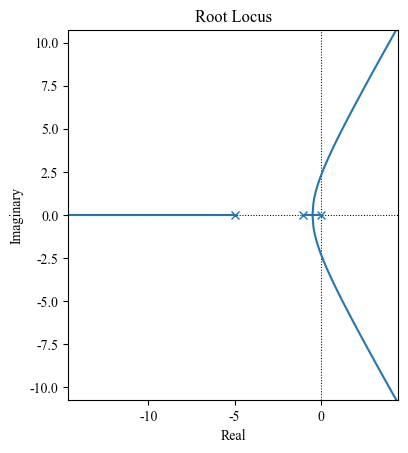

In [12]:
tf = control.TransferFunction([1], [1, 6, 5, 0])
fig, ax = plt.subplots()
ax.set_aspect('equal')
rlist, klist = control.root_locus(tf, grid=False, ax=ax)

# P2

In [22]:
(s * (s + 1) * (s ** 2 + 4 * s + 5) + K * (s + 3)).as_poly()

Poly(s**4 + 5*s**3 + 9*s**2 + s*K + 5*s + 3*K, s, K, domain='ZZ')

In [66]:
A = sympy.zeros(4)
A[0] = [1, 5]
A[1] = [9, K + 5]
A[2] = [3 * K]

for i in range(2, 4):
    for j in range(0, 4 - i):
        A[i, j] = sympy.simplify(A[i - 2, j + 1] -
                                 A[i - 2, 0] * A[i - 1, j + 1] / A[i - 1, 0])

A

Matrix([
[                           1,     9, 3*K, 0],
[                           5, K + 5,   0, 0],
[                     8 - K/5,   3*K,   0, 0],
[(K**2 + 40*K - 200)/(K - 40),     0,   0, 0]])

In [74]:
x = sympy.solve(sympy.numer(A[3, 0]))[0]
x

-20 + 10*sqrt(6)

In [75]:
x.evalf()

4.49489742783178

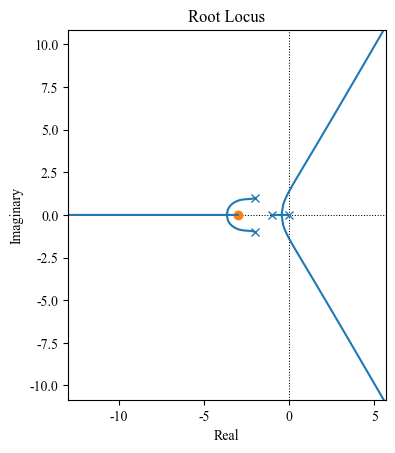

In [156]:
tf = control.tf([1,3], [1, 5, 9, 5, 0])
fig, ax = plt.subplots()
ax.set_aspect('equal')
rlist, klist = control.root_locus(tf, grid=False, ax=ax)

In [ ]:
D = K
G = (s + 3) / (s * (s**2 + 4 * s + 5))
H = 1 / (s + 1)

Gc = (D * G / (1 + D * G * H)).simplify()
Gc

K*(s + 1)*(s + 3)/(K*(s + 3) + s*(s + 1)*(s**2 + 4*s + 5))

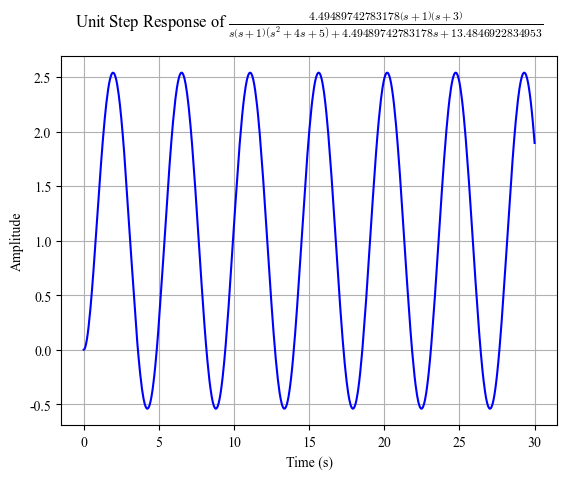

In [80]:
tf = TransferFunction.from_rational_expression(
    Gc.subs(K, x.evalf()))

step_response_plot(tf, upper_limit=30)

In [84]:
sympy.sqrt(x / 5 + 1).evalf()


1.37803464599638

In [87]:
[x.evalf() for x in sympy.solve(-3 * s**4 - 22 * s**3 - 54 * s**2 - 53 * s - 15)]

[-0.462450510379387,
 -1.65487223510666 - 0.545432531660146*I,
 -1.65487223510666 + 0.545432531660146*I,
 -3.56113835274062]

## P3

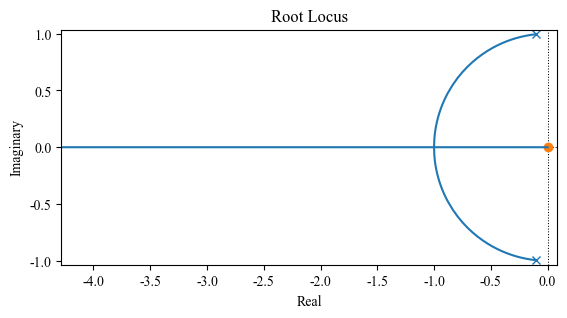

In [154]:
tf = control.tf([1, 0], [1, 0.2, 1])
fig, ax = plt.subplots()
ax.set_aspect('equal')
rlist, klist = control.root_locus(tf, grid=False, ax=ax)

## P4

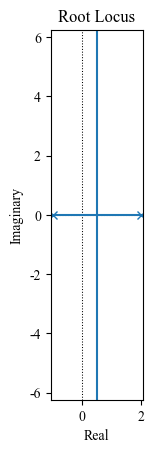

In [155]:
tf = control.tf([1], [1, -1, -2])
fig, ax = plt.subplots()
ax.set_aspect('equal')
rlist, klist = control.root_locus(tf, grid=False, ax=ax)

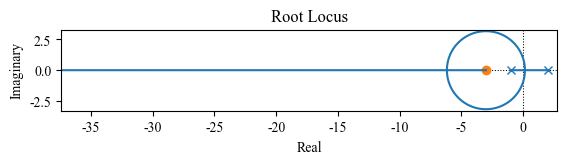

In [157]:
tf = control.tf([1, 3], [3, -3, -6])
fig, ax = plt.subplots()
ax.set_aspect('equal')
rlist, klist = control.root_locus(tf, grid=False, ax=ax)

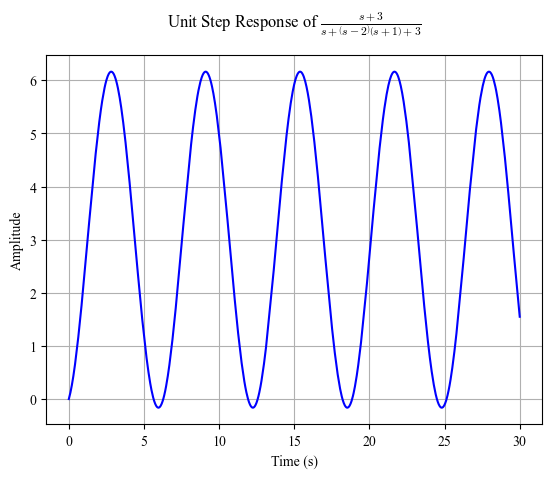

In [197]:
tf = TransferFunction(K * (1 + s / 3), (s + 1) * (s - 2) + K * (1 + s / 3),
                      s)

step_response_plot(tf.subs(K, 3), upper_limit=30)

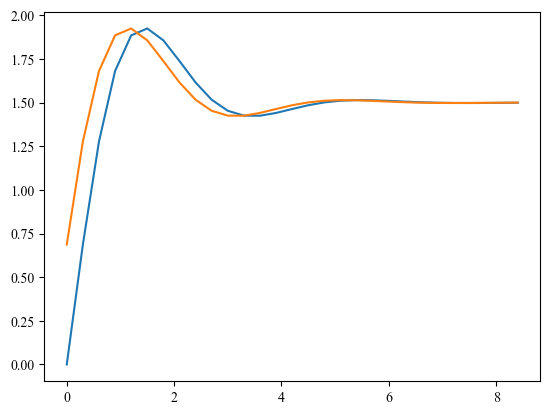

In [206]:
def expr_to_control(sys, dt=0):
    num, den = (np.array(p.as_poly().all_coeffs(), dtype=float)
                for p in sys.as_numer_denom())
    return control.tf(num, den, dt)


G = ((6 * T**2 + 2 * T) * s - 2 * T) / ((4 * T**2 + T + 1) * s**2 -
                                        (T + 2) * s + 1)
dsys = expr_to_control(G.subs(T, 0.3), dt=0.3)
sys = expr_to_control(tf.subs(K, 6).to_expr())

fig, ax = plt.subplots()
Tout, yout = control.step_response(dsys)
ax.plot(Tout, yout)
Tout, yout = control.step_response(sys.sample(0.3, method='backward_diff'))
ax.plot(Tout, yout)

## P5

In [212]:
z, p = symbols('z, p', positive=True)
dict = sympy.solve([16 - 8 * p + 2 * K, 16 + z - 2 * K, -1000 + 100 * p + z - 10 * K])
dict

{K: 48, p: 14, z: 80}

array([-10.+0.j,  -2.+2.j,  -2.-2.j])

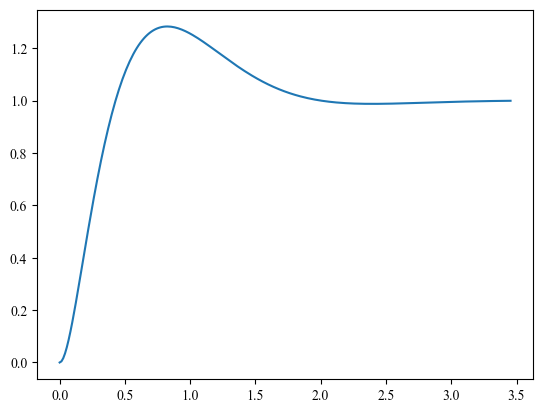

In [223]:
G = (K * s + z) / (s + p) / s**2
G = G / (1 + G)
sys = expr_to_control(G.simplify().subs(dict))
fig, ax = plt.subplots()
Tout, yout = control.step_response(sys)
ax.plot(Tout, yout)
sys.poles()